# TASK3
pip install pandas scikit-learn matplotlib


In [19]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# LOADING DATASET
data = pd.read_csv(r'C:\Users\haripriya\Desktop\Housing.csv')
print(data.head())
print(data.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

MAE: 1499746.4311620966
MSE: 3951199278132.8564
R² Score: 0.21829174676551721


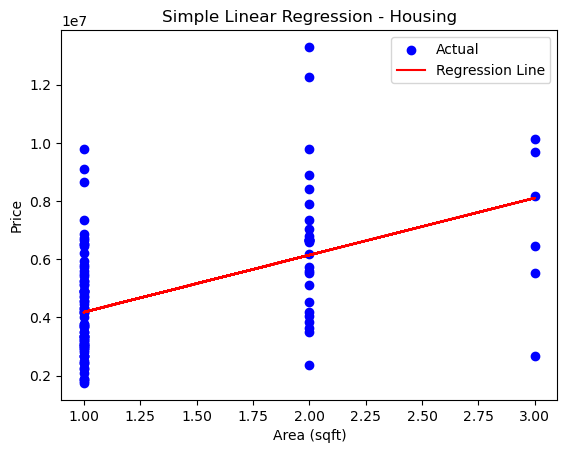

Intercept: 2223852.1737923394
Coefficient (Slope): 1960953.609106051


In [9]:
#Simple Linear Regression Example
# 2. Select feature and target
X = data[['bathrooms']]  # Independent variable
y = data['price']    # Target variable

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

# 7. Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Housing')
plt.legend()
plt.show()

# 8. Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")


MAE: 1265275.6699454375
MSE: 2750040479309.0513
R² Score: 0.45592991188724474
Intercept: 59485.37920871563
Feature Coefficients:
area: 345.4665700831112
bedrooms: 360197.65045750595
bathrooms: 1422319.6576414115


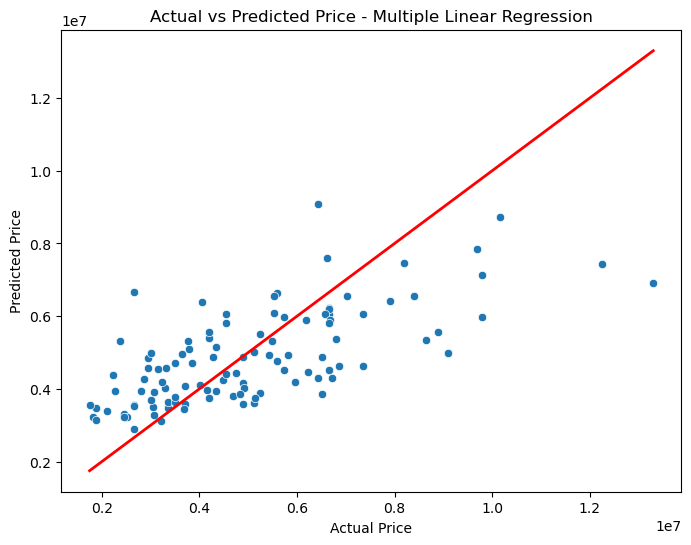

In [18]:
# Multiple Linear Regression Example
# Example with multiple features
X = data[['area', 'bedrooms', 'bathrooms']]  # Adjust based on your dataset
y = data['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

# Coefficients
print(f"Intercept: {model.intercept_}")
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
# Scatterplot for Predicted vs Actual
#Option 1: Predicted vs Actual Plot (Best for Any Regression)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price - Multiple Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.show()

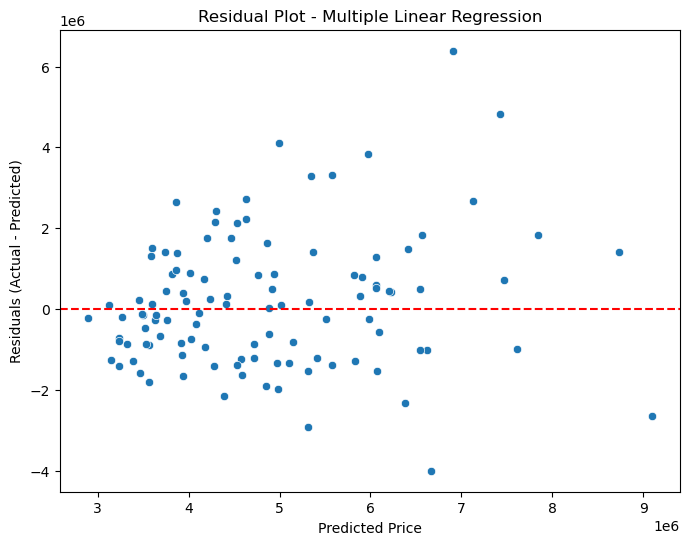

In [17]:
#Option 2: Residual Plot (Error Analysis)
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Multiple Linear Regression")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


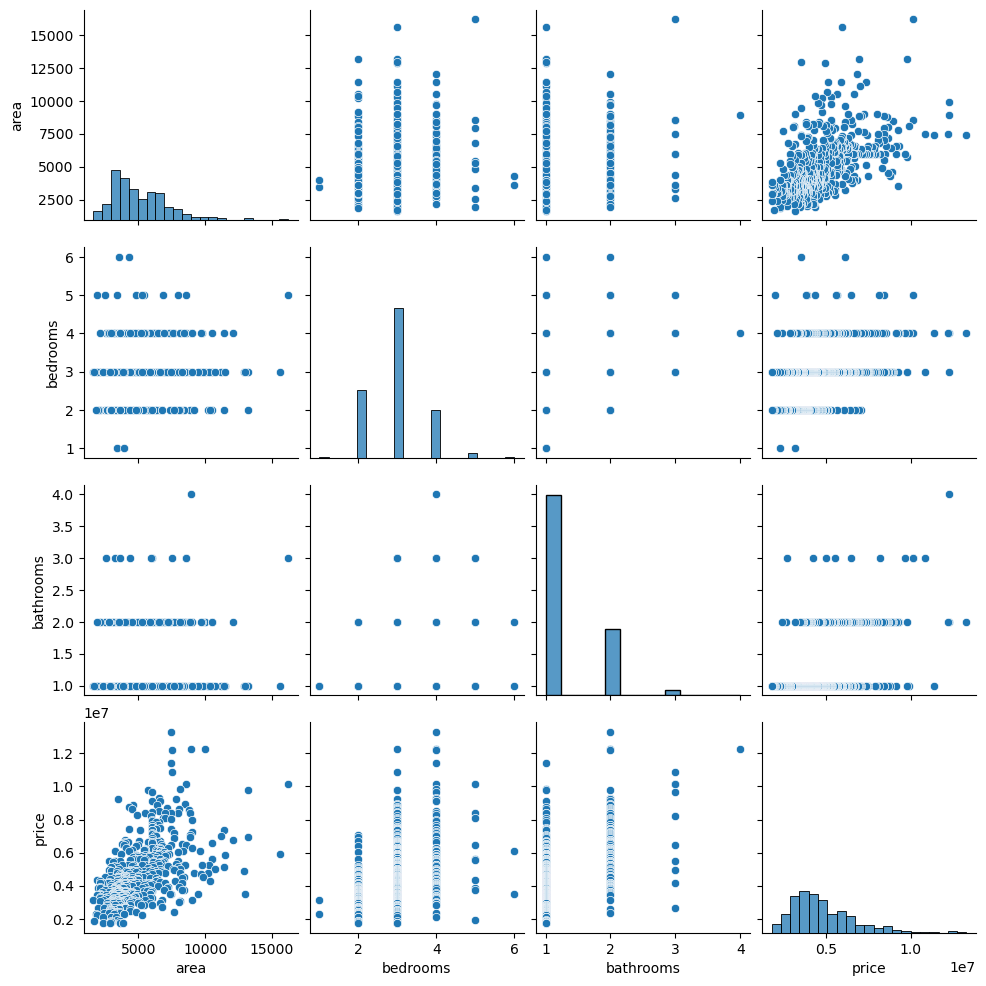

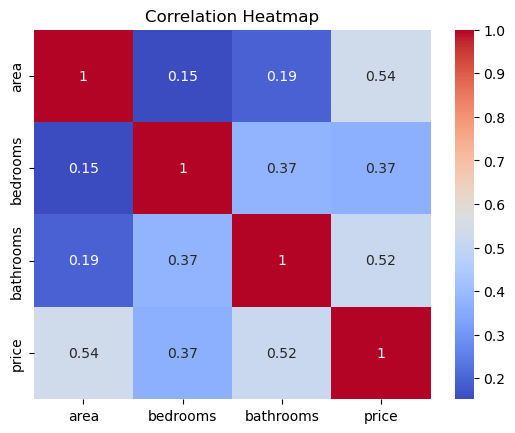

In [16]:
#Option 3: Pairplot or Heatmap (EDA Support, Feature Insights)
sns.pairplot(data[['area', 'bedrooms', 'bathrooms', 'price']])
plt.show()

# Or correlation heatmap
sns.heatmap(data[['area', 'bedrooms', 'bathrooms', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 # TASK4

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Step 1: Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

print(f"Shape of Data: {X.shape}")
print(f"First 5 Target Labels: {y[:5]}")



Shape of Data: (569, 30)
First 5 Target Labels: [0 0 0 0 0]


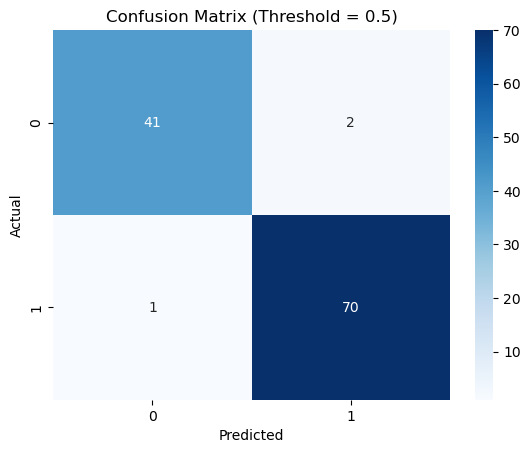


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 1.00


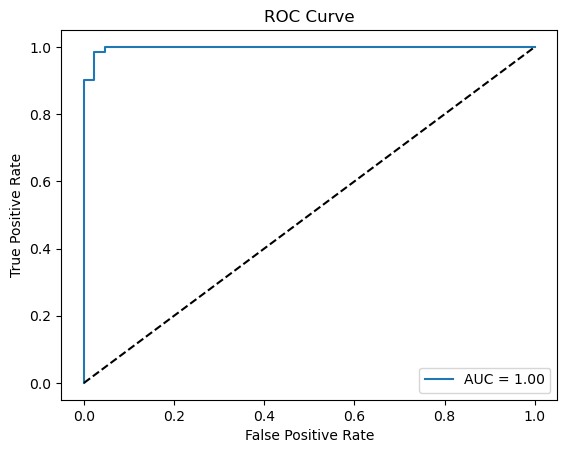

In [23]:
# Step 2: Train-Test Split & Standardize
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



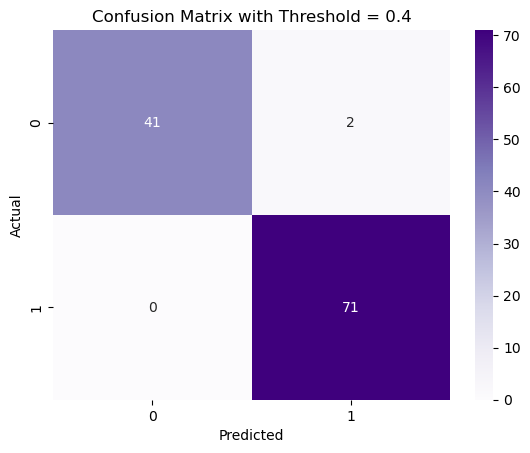


Classification Report with Threshold 0.4:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [22]:
# Step 5: Threshold Tuning Example
custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Purples')
plt.title(f"Confusion Matrix with Threshold = {custom_threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report with Threshold 0.4:")
print(classification_report(y_test, y_pred_custom))

# Sigmoid Function Example (for illustration)
def sigmoid(z):
    ret
